## Data visualisation

In [11]:
# We get the input values
X = data['cell_profiler_vector'].tolist()
X = np.asarray(X)
# Output values
y = data['Intensity_MeanIntensity_illumMITO_cells.1'].values

In [12]:
print('Shape X: {} Shape y: {}'.format(X.shape, y.shape))

Shape X: (5171, 1864) Shape y: (5171,)


In [ ]:
y_binary = []
for i in np.arange(0,len(y)+1):
    if mito_value <= threshold:
        label = 1
    else:
        label = 0
    y_binary.append(label)

In [41]:
df = pd.merge(cell_profiler.copy().drop(['cell_profiler_vector'],axis=1), data[['ID_library','Intensity_MeanIntensity_illumMITO_cells.1']],
                left_on= 'ID_covid', right_on='ID_library', how='left')
df = df.drop(['ID_covid', 'ID_library'],axis=1)
df.head()

,Count_nuclei,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,AreaShape_Compactness_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_8_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,Intensity_MeanIntensity_illumMITO_cells.1
0,193.111111,1800.254037,2425.918124,1093.845008,1152.427871,1045.463244,1103.810619,1069.132647,1127.618663,1.138295,...,-0.041472,0.029698,-0.069107,0.015343,0.034094,0.135784,-0.012082,0.138240,0.042389,0.008777
1,242.888889,1728.176283,2305.202711,1115.833761,1161.365196,1068.625941,1113.715763,1091.731459,1137.041226,1.133682,...,-0.012074,-0.023890,0.097694,-0.024771,0.003519,0.030487,0.027094,-0.019137,-0.004051,0.008477
2,199.000000,1752.473795,2362.270982,1103.365280,1137.814079,1055.657555,1089.743856,1079.003305,1113.304014,1.139450,...,0.052860,0.019217,-0.019048,0.025002,-0.032270,-0.019920,0.020209,0.031901,0.039423,0.008487
3,226.555556,1986.790362,2626.938955,1131.691573,1115.502430,1081.084579,1064.466968,1105.880512,1089.501774,1.125735,...,-0.003855,-0.066247,-0.009865,0.105897,0.050925,-0.084664,0.028926,-0.009254,0.000593,0.005784
4,197.222222,1727.657115,2330.338123,1086.800230,1144.507585,1039.318721,1096.989619,1062.571514,1120.267519,1.137588,...,0.017231,-0.008669,-0.019241,0.012336,0.048515,0.062975,-0.019302,0.009554,0.011530,0.008265


In [42]:
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (5176, 1865)


In [58]:
feat_cols = df.columns.tolist()
feat_cols = feat_cols[:-1]

In [61]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.9649     0.01101093 0.01053278]


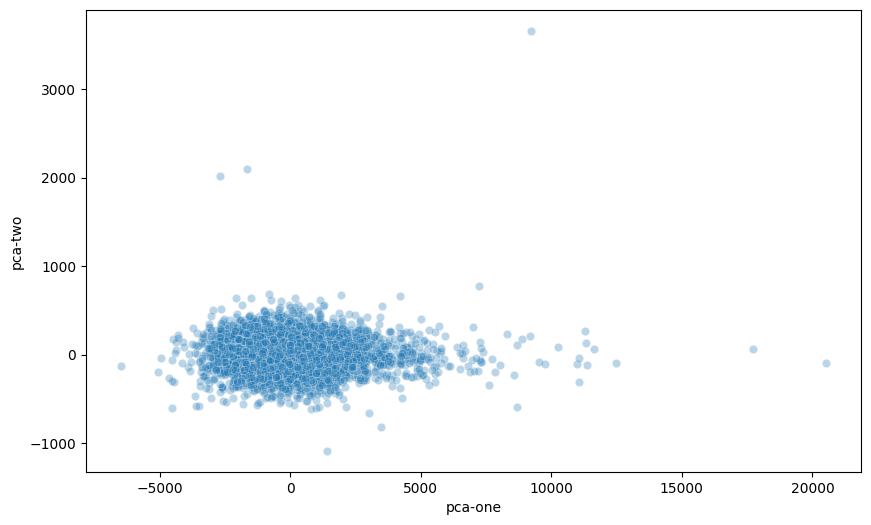

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="pca-one", y="pca-two",
    palette=sns.color_palette("hls", 10),
    data=df.loc[np.random.permutation(df.shape[0]),:],
    alpha=0.3
)
plt.show()

In [85]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

N = 5000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.96464396 0.01112433 0.01052077]


In [86]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.013s...
[t-SNE] Computed neighbors for 5000 samples in 3.461s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 110.485633
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.693436
[t-SNE] KL divergence after 300 iterations: 2.068330


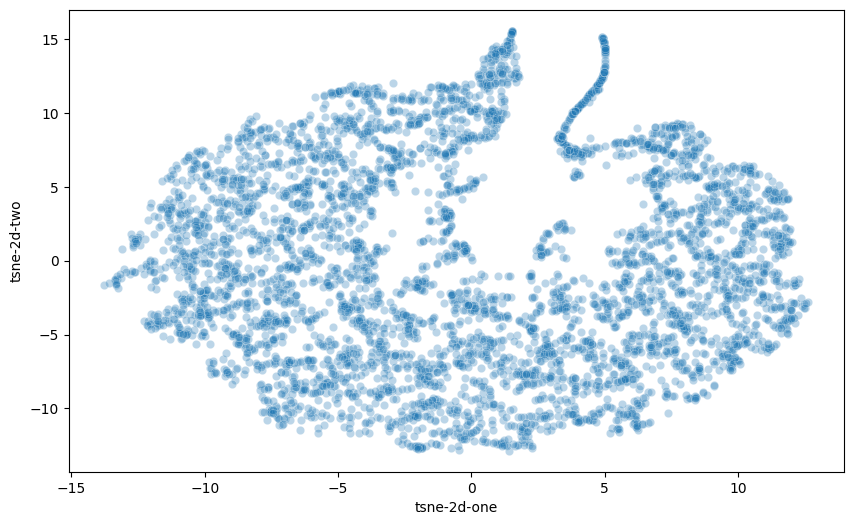

In [87]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)
plt.show()